In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv('int20h-ds-test-dataset.csv')
df.head()

,userid,user_state,event_name,event_attributes,event_created_date,event_platform,device_manufacture,device_model
0,c95c777785faec8dd910d019d7278ebe,CA,Add Vehicle Success,"{""Make"":""Dodge"",""Model"":""Caravan"",""Color"":""Whi...",2022-01-16 17:03:04,android,samsung,SM-N975U
1,c95c777785faec8dd910d019d7278ebe,CA,Add Vehicle Break,{},2022-01-16 17:07:47,android,samsung,SM-N975U
2,f344be2d9a042b7444f3cc5279e38ef1,FL,Calculator View,{},2022-01-16 17:16:25,android,samsung,SM-G973U1
3,c95c777785faec8dd910d019d7278ebe,CA,Add Payment Method Success,"{""Payment Method"":""Credit"",""Tokenized Pay"":""""}",2022-01-16 17:24:22,android,samsung,SM-N975U
4,e331ed81422d8fba55520a43a872e701,IL,Sign Up Success,"{""Method"":""Apple""}",2022-01-16 17:34:51,ios,Apple,"iPhone12,1"


In [3]:
df[df['userid'] == 'c95c777785faec8dd910d019d7278ebe']

,userid,user_state,event_name,event_attributes,event_created_date,event_platform,device_manufacture,device_model
0,c95c777785faec8dd910d019d7278ebe,CA,Add Vehicle Success,"{""Make"":""Dodge"",""Model"":""Caravan"",""Color"":""Whi...",2022-01-16 17:03:04,android,samsung,SM-N975U
1,c95c777785faec8dd910d019d7278ebe,CA,Add Vehicle Break,{},2022-01-16 17:07:47,android,samsung,SM-N975U
3,c95c777785faec8dd910d019d7278ebe,CA,Add Payment Method Success,"{""Payment Method"":""Credit"",""Tokenized Pay"":""""}",2022-01-16 17:24:22,android,samsung,SM-N975U
19083,c95c777785faec8dd910d019d7278ebe,CA,Account History Transaction Details,"{""Navigated From"":""Account History"",""Status"":""...",2022-04-03 23:58:01,android,samsung,SM-N975U
19084,c95c777785faec8dd910d019d7278ebe,CA,Account History Transaction Details,"{""Navigated From"":""Account History"",""Status"":""...",2022-04-03 23:58:22,android,samsung,SM-N975U
21196,c95c777785faec8dd910d019d7278ebe,CA,Order,"{""Premium Membership"":""False""}",2022-04-10 10:21:39,outofband,NaN,NaN
21197,c95c777785faec8dd910d019d7278ebe,CA,Order,"{""Premium Membership"":""False""}",2022-04-10 10:22:44,outofband,NaN,NaN
21198,c95c777785faec8dd910d019d7278ebe,CA,Order,"{""Premium Membership"":""False""}",2022-04-10 10:22:44,outofband,NaN,NaN


 Датасет має вигляд логів івентів, які робили користувачі. Тому доцільно перетворити початковий датасет в такий, де поле userid міститиме лише унікальні значення, а івенти та їх атрибути представимо у вигляді нових признаків для кожного унікального користувача

### 1. Pre-processing

In [4]:
# функція, що на вхід приймає рядок датасету, витягує звідти event_name та всі ключі атрибутів, а потім створює на їх основі нові поля

def refactoring(row):
    row[row['event_name']] = 1
        
    if row['event_attributes'] != '{}':       
        row['event_attributes'] = row['event_attributes'].replace('""', '"{}"')
        column_names = re.findall('(?:")([\w\s]+)(?:":)', row['event_attributes'])
        values = re.findall('(?::")([^"]+)(?:")', row['event_attributes'])
        
        for i in range(len(column_names)):
            if column_names[i] == 'Start Date' and row['event_name'] == 'Add Vehicle Success':
                column_names[i] += '_'
            row[column_names[i]] = values[i]
    return row

In [5]:
df = df.apply(refactoring, axis=1).replace('{}', None)
df = df.set_index('userid')
df.drop(['event_name', 'event_attributes'], inplace=True, axis=1)
pd.set_option('display.max_columns', None)

##### Всі event_attributes та event_name винесені в окремі стовбці. В результаті отримано наступний вигляд:

In [6]:
df.head(3)

,Account History Transaction Details,Account Setup Profile Skip,Account Setup Skip,Add Payment Method Failed,Add Payment Method Success,Add Vehicle Break,Add Vehicle Failed,Add Vehicle Success,Amount,Calculator Used,Calculator View,Chat Conversation Opened,Chat Conversation Started,Color,Description,Email Confirmation Success,End Date,Error Code,Error Message,From,Google Map Installed,Id,Make,Membership Type,Method,Model,Navigated From,Order,Payment Method,Premium Membership,Promo code,Renewal Date,Rental State,Rental state,Required,Reset Password Set,Screen,Selected Route Type,Sign Out,Sign Up Error,Sign Up Success,Start Date,Start Date_,Status,Subscription Premium,Subscription Premium Cancel,Subscription Premium Renew,Temporary,Tokenized Pay,Transaction Refund,Transaction Type,Transaction type,Type,Wallet Opened,Year,device_manufacture,device_model,event_created_date,event_platform,user_state
userid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
c95c777785faec8dd910d019d7278ebe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,White,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,Dodge,NaN,NaN,Caravan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,false,NaN,NaN,NaN,NaN,NaN,NaN,2019,samsung,SM-N975U,2022-01-16 17:03:04,android,CA
c95c777785faec8dd910d019d7278ebe,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,samsung,SM-N975U,2022-01-16 17:07:47,android,CA
f344be2d9a042b7444f3cc5279e38ef1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,samsung,SM-G973U1,2022-01-16 17:16:25,android,FL


##### Провівши поверхневий аналіз можна зробити висновок, що наступні признаки статистично незначимі:
###### 'Description', 'Error Code', 'Error Message', 'From', 'Google Map Installed', 'Screen', 'Status', 'Type', 'Add Vehicle Time'

In [7]:
# видаляємо з датасету статистично незначимі признаки
df = df.drop(['Description', 'Error Code', 'Error Message', 'From', 'Google Map Installed', 'Screen', 'Status', 'Type'], axis=1)
df.head(3)

,Account History Transaction Details,Account Setup Profile Skip,Account Setup Skip,Add Payment Method Failed,Add Payment Method Success,Add Vehicle Break,Add Vehicle Failed,Add Vehicle Success,Amount,Calculator Used,Calculator View,Chat Conversation Opened,Chat Conversation Started,Color,Email Confirmation Success,End Date,Id,Make,Membership Type,Method,Model,Navigated From,Order,Payment Method,Premium Membership,Promo code,Renewal Date,Rental State,Rental state,Required,Reset Password Set,Selected Route Type,Sign Out,Sign Up Error,Sign Up Success,Start Date,Start Date_,Subscription Premium,Subscription Premium Cancel,Subscription Premium Renew,Temporary,Tokenized Pay,Transaction Refund,Transaction Type,Transaction type,Wallet Opened,Year,device_manufacture,device_model,event_created_date,event_platform,user_state
userid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
c95c777785faec8dd910d019d7278ebe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,White,NaN,None,NaN,Dodge,NaN,NaN,Caravan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,false,NaN,NaN,NaN,NaN,NaN,2019,samsung,SM-N975U,2022-01-16 17:03:04,android,CA
c95c777785faec8dd910d019d7278ebe,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,samsung,SM-N975U,2022-01-16 17:07:47,android,CA
f344be2d9a042b7444f3cc5279e38ef1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,samsung,SM-G973U1,2022-01-16 17:16:25,android,FL


##### Натомість додамо новий признак - сумарний час преміум-підписки для кожного користувача за даний проміжок часу, використовуючи інформацію признаку event_created_date

In [8]:
# функція, що створює нове поле Subscription Premium Time

def add_subscription_time(row):
    if type(row['Start Date']) == str:
        row['Subscription Premium Time'] = pd.to_datetime(row['Renewal Date']) - pd.to_datetime(row['Start Date'])
    return row

In [9]:
df = df.apply(add_subscription_time, axis=1)

# обробка даних
df['Make'].replace('Merecedes-benz', 'Mercedes-Benz', inplace=True)
df['Amount'] = pd.to_numeric(df['Amount'])
df['Amount'].fillna(0, inplace=True)

##### Після обробки даних, згрупуємо користувачів

In [10]:
# Для категоріальних змінних створимо спеціальні агрегуючі функції

# функція, що агрегує категоріальні змінні
agg_categorical = lambda x: x.value_counts().index[0] if len(x.value_counts()) > 0  else 'no_value'                             

# функція, що агрегує особливий атрибут Required (event_name 'Email Confirmation Success')
agg_required = lambda x: x.value_counts()[0] if len(x.value_counts()) > 0  else 0              

#  функція, що агрегує особливий атрибут Year (event_name 'Add Vehicle Success')
agg_year = lambda x: str(int(pd.to_numeric(x).max())) if len(x.value_counts()) > 0  else 'no_value'

#  функція, що агрегує event 'event_created_date'
agg_event_date = lambda x: pd.to_datetime(x).max() - pd.to_datetime(x).min() if len(x.value_counts()) > 0  else 'no_value'

df = df.groupby(level=0).agg({'Account History Transaction Details': np.sum, 'Account Setup Profile Skip':np.sum,  
               'Account Setup Skip':np.sum, 'Add Payment Method Failed':np.sum, 
               'Add Payment Method Success':np.sum, 'Add Vehicle Break':np.sum,
               'Add Vehicle Break':np.sum, 'Add Vehicle Failed':np.sum, 
               'Add Vehicle Success':np.sum, 'Amount':np.sum,
               'Calculator Used':np.sum, 'Calculator View':np.sum, 
               'Chat Conversation Opened':np.sum, 'Chat Conversation Started':np.sum,
               'Color': agg_categorical, 'Email Confirmation Success':np.sum,
               'Email Confirmation Success':np.sum, 'Make': agg_categorical, 
               'Membership Type': agg_categorical, 'Method': agg_categorical,
               'Order':np.sum, 'Payment Method': agg_categorical, 
               'Premium Membership': agg_categorical, 'Required':agg_required,
               'Reset Password Set':np.sum, 'Sign Out':np.sum, 
               'Sign Up Error':np.sum, 'Sign Up Success':np.sum,
               'Subscription Premium': np.sum, 'Subscription Premium Cancel': np.sum,
               'Subscription Premium Renew': np.sum, 'Temporary': agg_categorical,
               'Tokenized Pay': agg_categorical, 'Transaction Refund': np.sum,
               'Wallet Opened': np.sum, 'Year': agg_year, 'device_manufacture': agg_categorical,
               'event_platform': agg_categorical, 'user_state': agg_categorical,
               'event_created_date': agg_event_date, 'Subscription Premium Time': np.sum
                               })

In [11]:
df.head()

,Account History Transaction Details,Account Setup Profile Skip,Account Setup Skip,Add Payment Method Failed,Add Payment Method Success,Add Vehicle Break,Add Vehicle Failed,Add Vehicle Success,Amount,Calculator Used,Calculator View,Chat Conversation Opened,Chat Conversation Started,Color,Email Confirmation Success,Make,Membership Type,Method,Order,Payment Method,Premium Membership,Required,Reset Password Set,Sign Out,Sign Up Error,Sign Up Success,Subscription Premium,Subscription Premium Cancel,Subscription Premium Renew,Temporary,Tokenized Pay,Transaction Refund,Wallet Opened,Year,device_manufacture,event_platform,user_state,event_created_date,Subscription Premium Time
userid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0006869712ec9841dc36234bce245203,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,White,0.0,Chevrolet,Monthly,no_value,0.0,Debit,no_value,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,false,no_value,0.0,0.0,2011,samsung,android,MD,30 days 06:24:31,397 days
000a59897372c5e3c147b15685fefc65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,no_value,0.0,no_value,no_value,Apple,0.0,no_value,no_value,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,no_value,no_value,0.0,0.0,no_value,Apple,ios,CA,0 days 00:00:00,0 days
001244c572f1a681553bc045a378cacf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,no_value,0.0,no_value,no_value,Google,0.0,no_value,no_value,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,no_value,no_value,0.0,0.0,no_value,samsung,android,FL,0 days 00:00:00,0 days
0032cb66b99f6baef57ec2aa04a9277f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,no_value,0.0,no_value,no_value,Apple,0.0,no_value,no_value,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,no_value,no_value,0.0,0.0,no_value,Apple,ios,CA,0 days 00:00:00,0 days
003f57fe2631ade57a86f6a2b96bb20c,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,Silver,0.0,Ford,no_value,Apple,0.0,no_value,no_value,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,false,no_value,0.0,0.0,2014,Apple,ios,CA,0 days 00:05:37,0 days


In [12]:
df.loc[['0006869712ec9841dc36234bce245203']]

,Account History Transaction Details,Account Setup Profile Skip,Account Setup Skip,Add Payment Method Failed,Add Payment Method Success,Add Vehicle Break,Add Vehicle Failed,Add Vehicle Success,Amount,Calculator Used,Calculator View,Chat Conversation Opened,Chat Conversation Started,Color,Email Confirmation Success,Make,Membership Type,Method,Order,Payment Method,Premium Membership,Required,Reset Password Set,Sign Out,Sign Up Error,Sign Up Success,Subscription Premium,Subscription Premium Cancel,Subscription Premium Renew,Temporary,Tokenized Pay,Transaction Refund,Wallet Opened,Year,device_manufacture,event_platform,user_state,event_created_date,Subscription Premium Time
userid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0006869712ec9841dc36234bce245203,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,White,0.0,Chevrolet,Monthly,no_value,0.0,Debit,no_value,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,false,no_value,0.0,0.0,2011,samsung,android,MD,30 days 06:24:31,397 days


Бажаний вигляд датасету отримано. Ми витягнули додаткову інформацію про атрибути івентів та можемо переходити до знаходження кореляції між признаками і цільовою функцією

### 2. Post-processing & EDA

In [13]:
df.head()

,Account History Transaction Details,Account Setup Profile Skip,Account Setup Skip,Add Payment Method Failed,Add Payment Method Success,Add Vehicle Break,Add Vehicle Failed,Add Vehicle Success,Amount,Calculator Used,Calculator View,Chat Conversation Opened,Chat Conversation Started,Color,Email Confirmation Success,Make,Membership Type,Method,Order,Payment Method,Premium Membership,Required,Reset Password Set,Sign Out,Sign Up Error,Sign Up Success,Subscription Premium,Subscription Premium Cancel,Subscription Premium Renew,Temporary,Tokenized Pay,Transaction Refund,Wallet Opened,Year,device_manufacture,event_platform,user_state,event_created_date,Subscription Premium Time
userid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0006869712ec9841dc36234bce245203,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,White,0.0,Chevrolet,Monthly,no_value,0.0,Debit,no_value,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,false,no_value,0.0,0.0,2011,samsung,android,MD,30 days 06:24:31,397 days
000a59897372c5e3c147b15685fefc65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,no_value,0.0,no_value,no_value,Apple,0.0,no_value,no_value,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,no_value,no_value,0.0,0.0,no_value,Apple,ios,CA,0 days 00:00:00,0 days
001244c572f1a681553bc045a378cacf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,no_value,0.0,no_value,no_value,Google,0.0,no_value,no_value,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,no_value,no_value,0.0,0.0,no_value,samsung,android,FL,0 days 00:00:00,0 days
0032cb66b99f6baef57ec2aa04a9277f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,no_value,0.0,no_value,no_value,Apple,0.0,no_value,no_value,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,no_value,no_value,0.0,0.0,no_value,Apple,ios,CA,0 days 00:00:00,0 days
003f57fe2631ade57a86f6a2b96bb20c,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,Silver,0.0,Ford,no_value,Apple,0.0,no_value,no_value,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,false,no_value,0.0,0.0,2014,Apple,ios,CA,0 days 00:05:37,0 days


##### Датасет має користувачів, які не здійснили ні одної дії, тому зробимо припущення що це 'dummy accounts' та видалимо їх, бо вони не несуть інформаційної цінності

In [14]:
# видаляємо 'dummy accounts' (ці користувачі не підписувалися за даний проміжок часу, який наданий в датасеті та не мало підписок раніше)
for index, row in df.iterrows():
    if row['Subscription Premium'] != 1 and row['Premium Membership'] != 'True':
        df = df.drop(index=[index])

In [15]:
df['Tokenized Pay'].value_counts()

no_value      454
Apple Pay     223
Google Pay     88
Name: Tokenized Pay, dtype: int64

Якщо залишити унікальне 'no_value' - ми створимо не існуючу залежність, що приведе до хибних результатів, але і заповнити модою теж не корректно.  
Натомість ми володіємо інформацією 'device_manufacture' про виробника телефону з якого здійнюється дія, яка не має пропущених значень.  
Відповідно Apple Pay можуть користуватися лише користувачі виробника Apple. Тому на основі цих знань заповнимо пропущені дані в 'Tokenized Pay'.

In [16]:
def fill_tokenized_col(row):
    if row['Tokenized Pay'] == 'no_value':
        if row['device_manufacture'] == 'Apple':
            row['Tokenized Pay'] = 'Apple Pay'
        else:
            row['Tokenized Pay'] = 'Google Pay'
    return row

In [17]:
# заповнюємо пропущені дані модою
df['Color'].replace('no_value', df['Color'].value_counts().index[0], inplace=True)
df['Make'].replace('no_value', df['Make'].value_counts().index[0], inplace=True)
df['Membership Type'].replace('no_value', df['Membership Type'].value_counts().index[0], inplace=True)
df['Method'].replace('no_value', df['Method'].value_counts().index[0], inplace=True)
df['Payment Method'].replace('no_value', df['Payment Method'].value_counts().index[0], inplace=True)
df['Temporary'].replace('no_value', df['Temporary'].value_counts().index[0], inplace=True)

# заповнюємо пропущені дані в полі Year медіанним значення
df['Year'].replace('no_value', '2010', inplace=True)
df = df.apply(fill_tokenized_col, axis=1)

df['Year'] = pd.to_numeric(df['Year'])

##### Представимо категоріальні признаки у числовому вигляді за допомогою Dummy Encoding, щоб знайти кореляцію цих признаків від цільової функції

In [18]:
categorical_cols = ["Color", 'user_state', 'event_platform', 'device_manufacture', 'Payment Method', 'Method', 'Membership Type', 'Make', 'Temporary', 'Tokenized Pay']
prefixes = ["Color", 'State', 'Platform', 'Manufacture', 'Payment', 'Method', 'Membership', 'Make', 'Temporary', 'Tokenized']
df_encoded = pd.get_dummies(df, columns=categorical_cols, prefix=prefixes)
df_encoded.head(3)

,Account History Transaction Details,Account Setup Profile Skip,Account Setup Skip,Add Payment Method Failed,Add Payment Method Success,Add Vehicle Break,Add Vehicle Failed,Add Vehicle Success,Amount,Calculator Used,Calculator View,Chat Conversation Opened,Chat Conversation Started,Email Confirmation Success,Order,Premium Membership,Required,Reset Password Set,Sign Out,Sign Up Error,Sign Up Success,Subscription Premium,Subscription Premium Cancel,Subscription Premium Renew,Transaction Refund,Wallet Opened,Year,event_created_date,Subscription Premium Time,Color_Beige,Color_Black,Color_Blue,Color_Brown,Color_Gold,Color_Gray,Color_Green,Color_Orange,Color_Other,Color_Red,Color_Silver,Color_White,Color_Yellow,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_IA,State_IL,State_IN,State_KS,State_KY,State_MA,State_MD,State_MI,State_MT,State_NC,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_TN,State_TX,State_UT,State_VA,State_VT,State_WI,State_WV,Platform_android,Platform_ios,Platform_outofband,Manufacture_Apple,Manufacture_BLU,Manufacture_FIH,Manufacture_Google,Manufacture_HMD Global,Manufacture_HUAWEI,Manufacture_LGE,Manufacture_OnePlus,Manufacture_TCL,Manufacture_Wingtech,Manufacture_motorola,Manufacture_no_value,Manufacture_samsung,Manufacture_vsmart,Payment_Credit,Payment_Credit Card,Payment_Debit,Payment_Google Pay,Payment_PayPal,Payment_Venmo,Method_Apple,Method_Email,Method_Facebook,Method_Google,Membership_Monthly,Membership_Yearly,Make_Acura,Make_Audi,Make_BMW,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Chrysler,Make_Dodge,Make_Fiat,Make_Ford,Make_GMC,Make_Grand Design,Make_Honda,Make_Hyundai,Make_Infiniti,Make_International,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Kenworth,Make_Kia,Make_Land Rover,Make_Lexus,Make_Lincoln,Make_Mazda,Make_Mclaren,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Newmar,Make_Nissan,Make_Oldsmobile,Make_Pontiac,Make_Porsche,Make_RAM,Make_Saturn,Make_Scion,Make_Subaru,Make_Suzuki,Make_Tesla,Make_Toyota,Make_Volkswagen,Make_Volvo,Make_Yamaha,Make_freightliner,Temporary_false,Temporary_true,Tokenized_Apple Pay,Tokenized_Google Pay
userid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0006869712ec9841dc36234bce245203,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,no_value,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2011,30 days 06:24:31,397 days,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
00596aa4edee32815aaf4aad659c484e,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,True,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2012,16 days 19:28:35,29 days,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
007b54670d72df309afd87befcbb63db,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,no_value,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2022,0 days 17:31:04,31 days,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0


##### Знаходимо кореляцію кожного признаку від цільової функції

In [19]:
corr_df = pd.DataFrame(df_encoded.corr().loc['Subscription Premium Cancel']).T
corr_df = corr_df.sort_values(by='Subscription Premium Cancel', axis = 1, ascending=False, key=lambda x: np.abs(x))
corr_df

,Subscription Premium Cancel,Chat Conversation Opened,Transaction Refund,Chat Conversation Started,Amount,Subscription Premium Renew,Platform_outofband,Payment_PayPal,Account Setup Profile Skip,State_TX,Subscription Premium,Temporary_false,Temporary_true,Order,Wallet Opened,State_NY,Sign Out,Platform_ios,Sign Up Success,Account History Transaction Details,Payment_Debit,Add Payment Method Success,State_IL,Manufacture_no_value,Make_Scion,State_AR,Platform_android,Make_Land Rover,State_CA,Account Setup Skip,Make_Honda,Membership_Yearly,Membership_Monthly,Make_RAM,Make_Jeep,Make_Pontiac,Make_Oldsmobile,Manufacture_HUAWEI,State_DC,State_GA,State_UT,State_AL,State_TN,State_WV,State_MA,Make_Buick,State_PA,State_CT,Make_Toyota,Make_GMC,Make_Lexus,Make_Lincoln,Make_Tesla,Calculator View,Add Vehicle Success,Payment_Credit Card,Make_Mini,Make_Mitsubishi,State_WI,Make_Infiniti,State_NH,Make_BMW,Manufacture_samsung,Color_Black,Make_Audi,Add Vehicle Break,State_FL,Color_Green,State_OH,Make_Fiat,Make_Porsche,Make_Volvo,State_NM,State_DE,Make_Ford,Manufacture_motorola,Color_Beige,Make_Kia,State_MD,Color_Gold,Make_Nissan,Manufacture_vsmart,Make_Suzuki,Make_Isuzu,Color_Yellow,Make_freightliner,Make_Yamaha,Make_Grand Design,State_MI,State_KS,Make_Newmar,Make_International,Make_Saturn,Reset Password Set,State_NV,State_MT,Make_Jaguar,State_IA,State_OR,Make_Mclaren,State_VT,Payment_Credit,Method_Email,State_AZ,Add Payment Method Failed,Color_Other,Email Confirmation Success,State_KY,Make_Kenworth,Manufacture_BLU,Manufacture_FIH,Color_Orange,Sign Up Error,State_CO,Payment_Venmo,Make_Chrysler,Method_Apple,Add Vehicle Failed,Make_Subaru,State_NJ,Make_Volkswagen,Required,Color_Brown,Manufacture_Wingtech,Payment_Google Pay,Manufacture_Apple,Tokenized_Apple Pay,Tokenized_Google Pay,Make_Mazda,Manufacture_LGE,Method_Facebook,Color_Red,Make_Acura,Color_Blue,Calculator Used,Color_White,Make_Chevrolet,State_VA,Make_Dodge,Make_Hyundai,Color_Silver,Color_Gray,Make_Mercedes-Benz,Manufacture_Google,Manufacture_OnePlus,State_IN,Make_Cadillac,State_OK,Manufacture_TCL,Manufacture_HMD Global,State_NC,Year,Method_Google
Subscription Premium Cancel,1.0,0.38175,0.381573,0.368942,-0.324806,-0.189285,-0.187523,0.118223,0.111585,-0.106361,0.10393,-0.100374,0.100374,-0.100042,0.09331,-0.09059,0.087778,0.087113,0.084929,0.076472,-0.075046,0.071773,0.068667,-0.068563,0.067069,0.067069,0.064904,0.059841,0.059813,0.059405,0.059271,-0.05643,0.05643,-0.055871,0.050763,0.047394,0.047394,0.047394,0.047394,0.047394,0.047394,0.047394,0.047394,0.047394,0.046056,0.046056,0.046056,-0.045558,-0.044147,-0.043412,-0.043412,0.043365,0.043365,0.043204,-0.043082,-0.0417,0.041655,-0.039691,-0.039429,-0.039429,-0.039429,-0.038544,0.037497,0.034571,-0.033776,0.03348,0.033449,-0.033331,-0.032172,-0.032172,-0.032172,-0.032172,-0.032172,-0.032172,0.03141,-0.029993,-0.027147,0.027012,0.025435,0.024708,-0.024383,-0.022734,-0.022734,-0.022734,-0.022734,-0.022734,-0.022734,-0.022734,-0.022734,-0.022734,-0.022734,-0.022734,-0.022734,-0.022734,-0.022734,-0.022734,-0.022734,-0.022734,-0.022734,-0.022734,-0.022734,0.021681,0.019862,-0.019524,-0.019032,-0.018878,0.017656,0.017448,0.017448,0.017448,0.017448,0.017448,0.017448,0.017448,0.017124,0.016913,-0.016768,-0.016486,0.015402,0.014397,-0.013963,0.013121,-0.012047,-0.010425,-0.010425,-0.010255,-0.010255,0.010255,0.010126,-0.008786,-0.008706,-0.008142,-0.007166,-0.006456,-0.005527,-0.005408,-0.003904,0.003192,0.003192,0.00298,0.002623,0.002623,-0.002597,0.002508,0.001935,0.001577,0.001577,0.001577,0.001113,0.001113,0.001113,0.000199,-0.000126


##### Зобразимо на barplot кореляції категоріальних признаків від цільової функції

In [20]:
encoded_columns, encoded_values = list(), list()

for prefix in ["Color", 'State', 'Platform', 'Manufacture', 'Payment', 'Make']:
    encoded = np.sort([col for col in corr_df.columns if col[:len(prefix)] == prefix])
    encoded_columns.append(encoded)
    encoded_values.extend(np.sort(list(corr_df[encoded].values)))

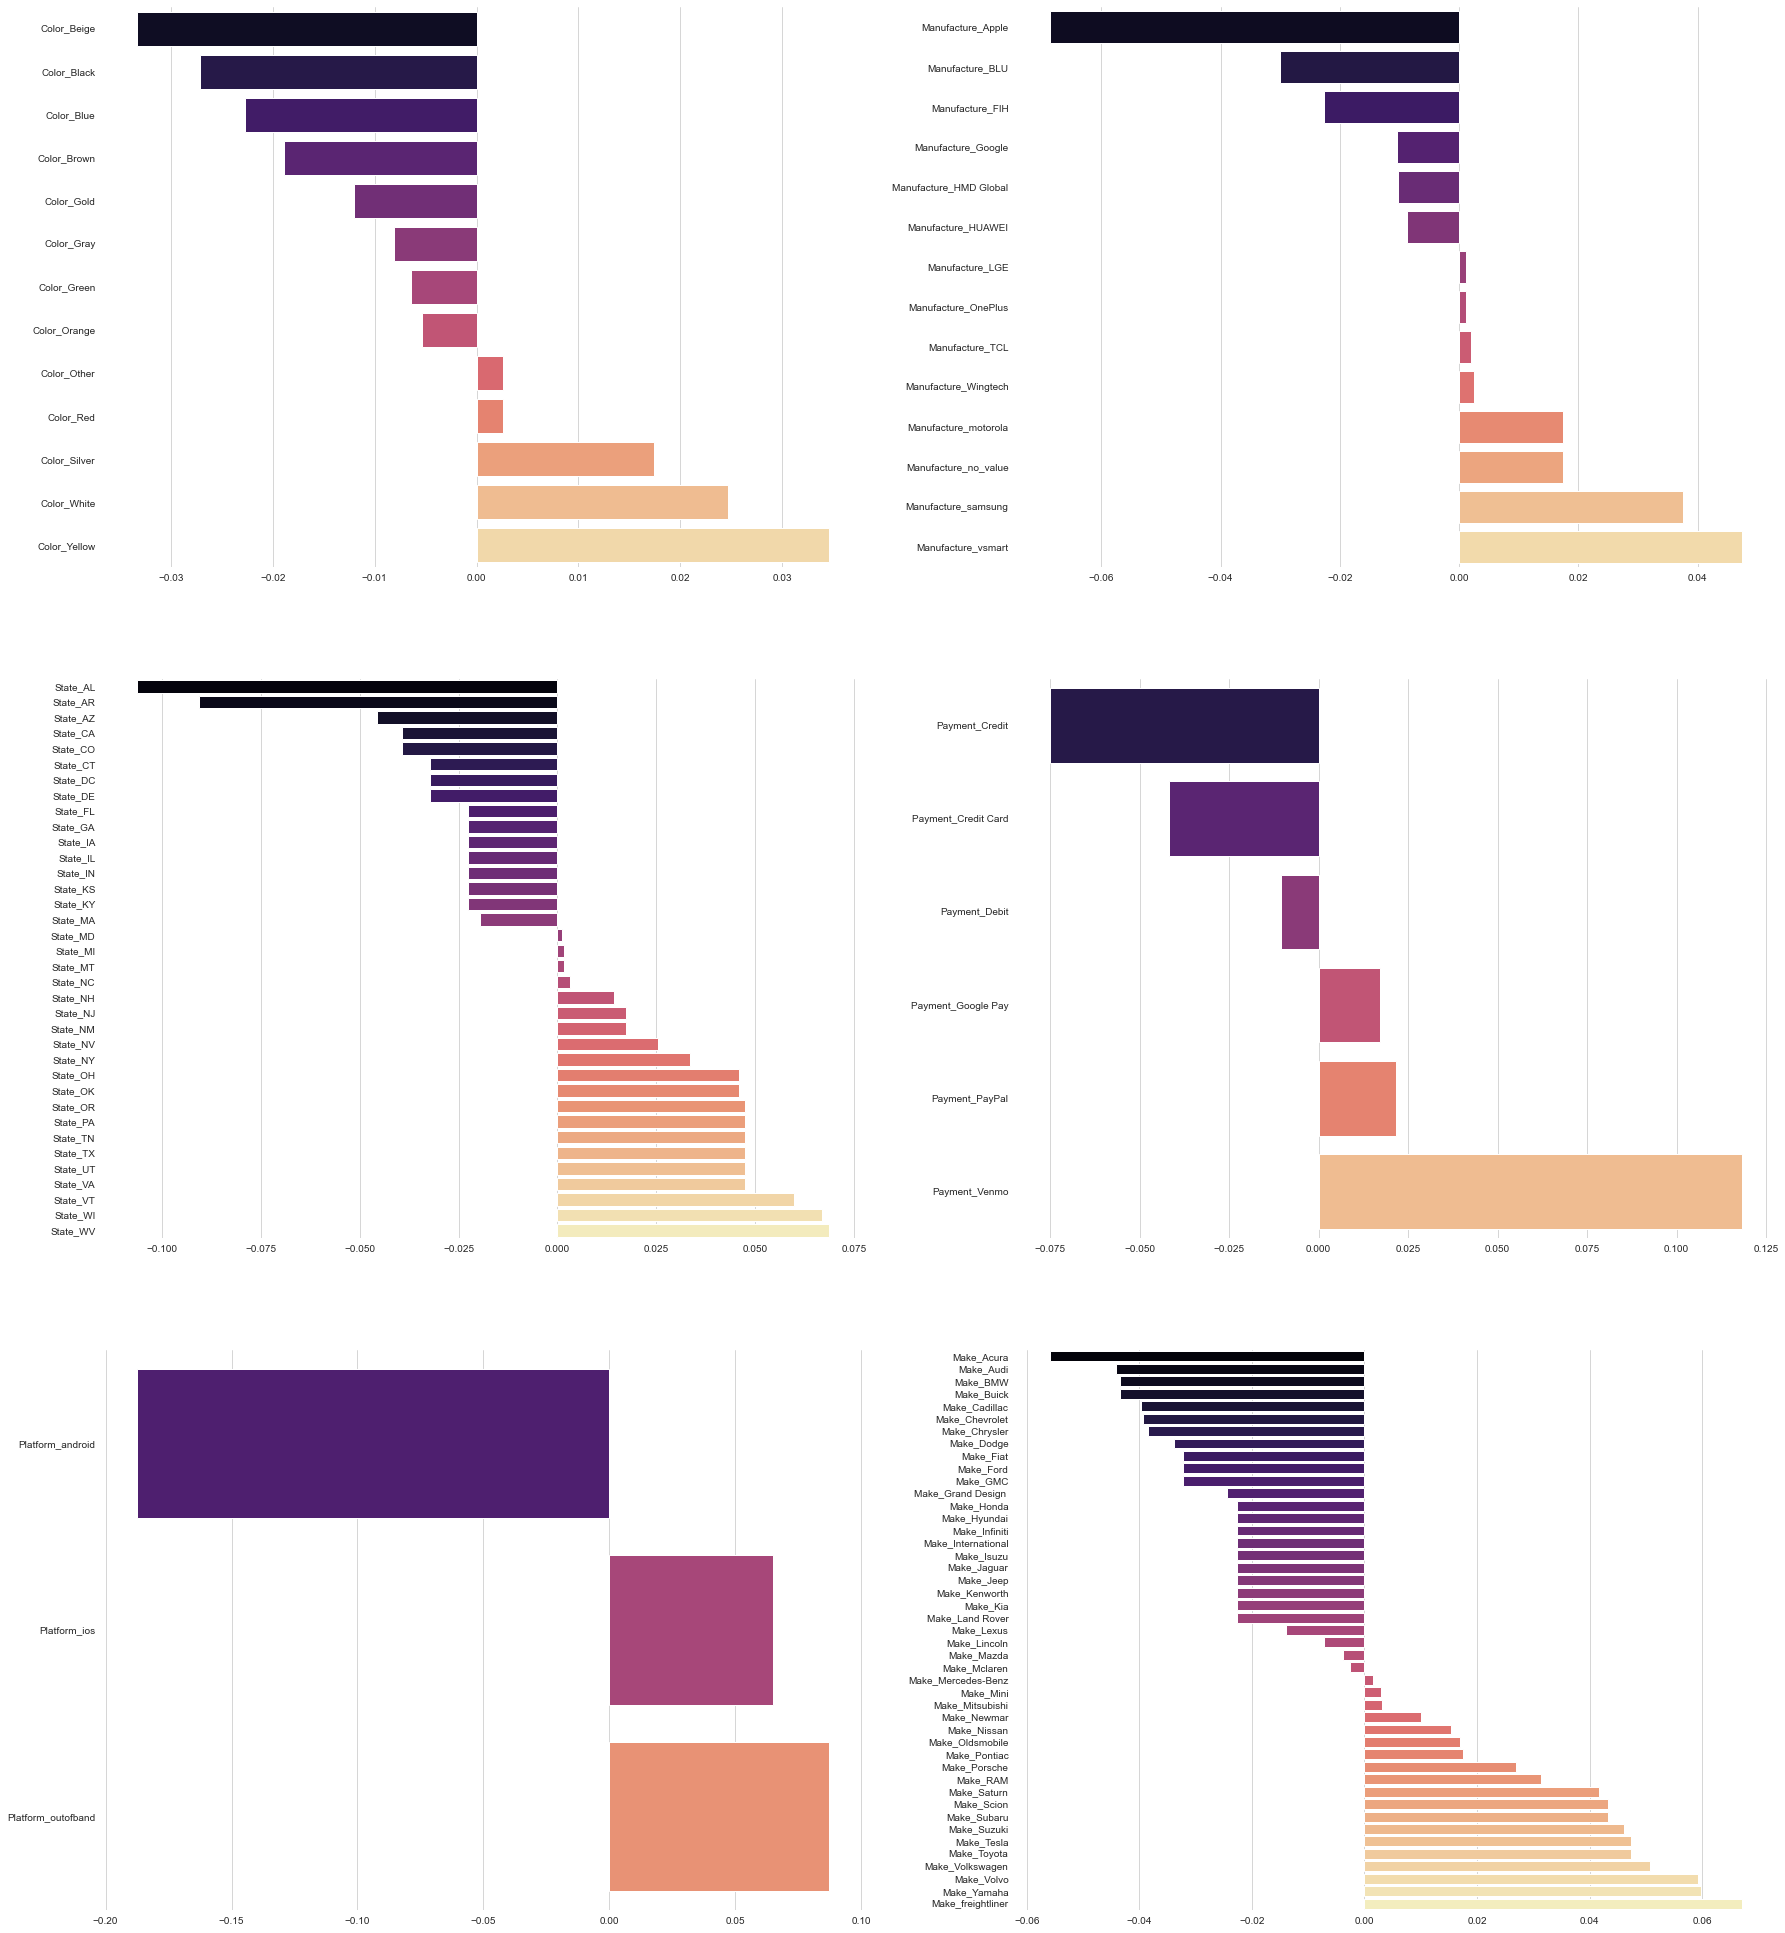

In [21]:
sns.set_style('whitegrid')

fig, axes = plt.subplots(3, 2, figsize=(30, 35))
for i in range(3):
    sns.barplot(y=encoded_columns[i], x=encoded_values[i], ax=axes[i, 0], orient='h', palette='magma')
    sns.barplot(y=encoded_columns[i+3], x=encoded_values[i+3], ax=axes[i, 1], orient='h', palette='magma')
    sns.despine(fig=fig, left=True, bottom=True)

##### Зобразимо загальну кореляцію всіх признаків від цільової функції

<AxesSubplot:>

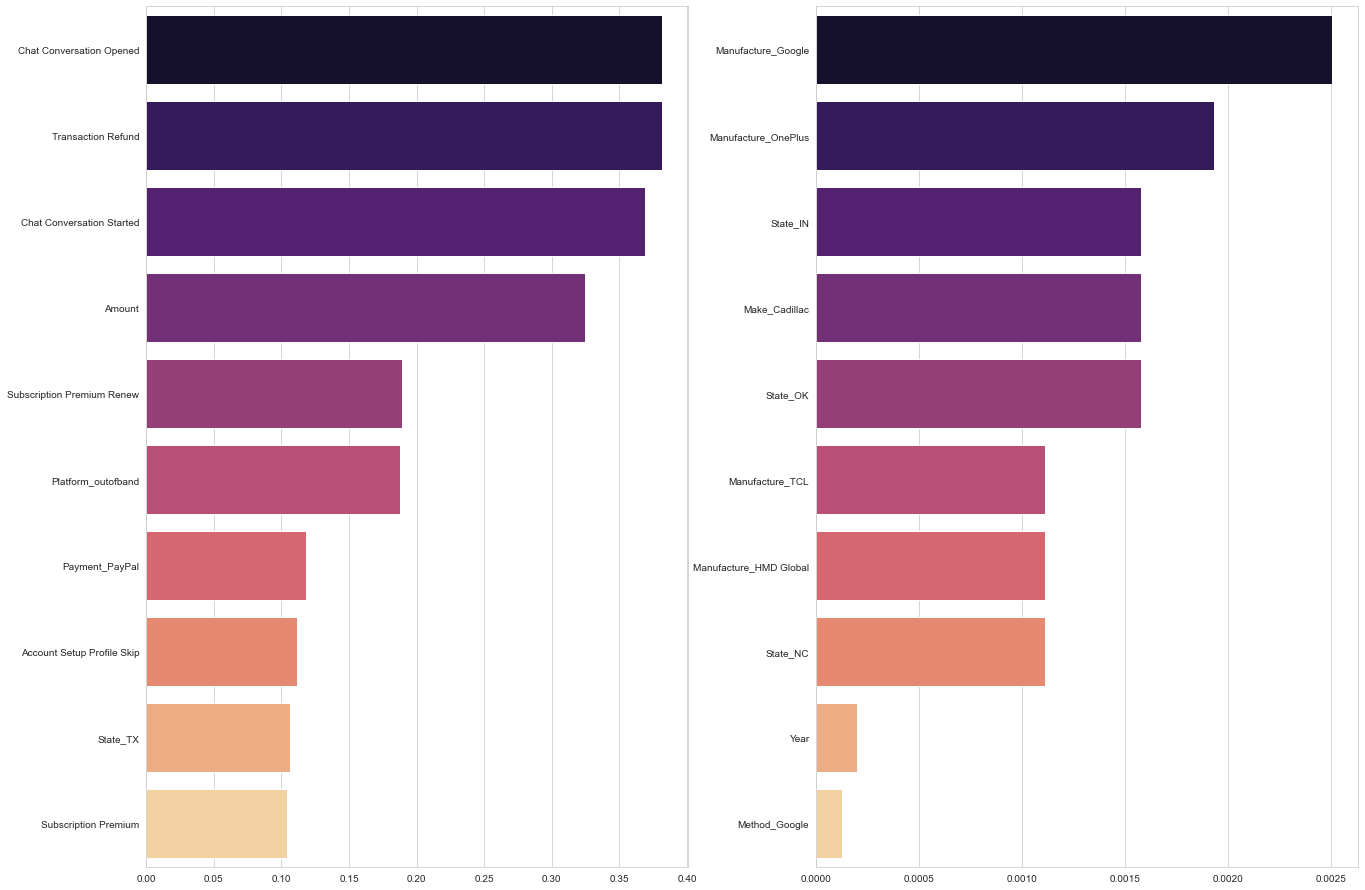

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(20, 15))
fig.tight_layout(pad=10)
sns.barplot(y=corr_df.columns[1:11], x=np.abs(corr_df.values[0][1:11]), orient='h', palette='magma', ax=axes[0])
sns.barplot(y=corr_df.columns[-10:], x=np.abs(corr_df.values[0][-10:]), orient='h', palette='magma', ax=axes[1])

##### Визначимо список перших/останніх 10-ти івентів та атрибутів які мають найбільшу/найменшу кореляцію з цільвою функцією

In [23]:
# найбільш корелюючі признаки та атрибути
corr_df[corr_df.columns[1:11]]

,Chat Conversation Opened,Transaction Refund,Chat Conversation Started,Amount,Subscription Premium Renew,Platform_outofband,Payment_PayPal,Account Setup Profile Skip,State_TX,Subscription Premium
Subscription Premium Cancel,0.38175,0.381573,0.368942,-0.324806,-0.189285,-0.187523,0.118223,0.111585,-0.106361,0.10393


In [24]:
# найменш корелюючі признаки та атрибути
corr_df[corr_df.columns[-10:]]

,Manufacture_Google,Manufacture_OnePlus,State_IN,Make_Cadillac,State_OK,Manufacture_TCL,Manufacture_HMD Global,State_NC,Year,Method_Google
Subscription Premium Cancel,0.002508,0.001935,0.001577,0.001577,0.001577,0.001113,0.001113,0.001113,0.000199,-0.000126
